In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Cleaned_Data.csv')

In [3]:
# choose relevant columns
df.columns

Index(['Unnamed: 0', 'rowid', 'kepid', 'kepoi_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_insol', 'koi_insol_err1',
       'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff',
       'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1',
       'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra',
       'dec', 'koi_kepmag'],
      dtype='object')

In [4]:
df_model = df[['koi_disposition', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_period', 'koi_duration', 'koi_depth', 'koi_prad', 
              'koi_teq', 'koi_insol', 'koi_steff', 'koi_srad']]

In [5]:
# get dummy data
df_dummy = pd.get_dummies(df_model)

In [11]:
# train test split
from sklearn.model_selection import train_test_split

X = df_dummy.drop('koi_score', axis=1)
y = df_dummy.koi_score.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=1)

In [12]:
# multiple linear regression
import statsmodels.api as sm
X_sm = X = sm.add_constant(X)
model = sm.OLS(y, X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     4355.
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        17:56:37   Log-Likelihood:                 3262.6
No. Observations:                9564   AIC:                            -6499.
Df Residuals:                    9551   BIC:                            -6406.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.2670      0.008     34.893      0.000       0.252       0.282
koi_fpflag_nt                       0.1890      0.005     35.465      0.000       0.179       0.199
koi_period                      -2.912e-06   1.32e-06     -2.202      0.028    -5.5e-06    -3.2e-07
koi_duration                       -0.0039      0.000    -13.197      0.000      -0.004      -0.003
koi_depth                       -1.695e-07   2.31e-08     -7.331      0.000   -2.15e-07   -1.24e-07
koi_prad                         2.129e-06   5.85e-07      3.638      0.000    9.82e-07    3.28e-06
koi_teq                         -2.938e-05   2.78e-06    -10.560      0.000   -3.48e-05   -2.39e-05
koi_insol                         5.16e-08   1.38e-08      3.737      0.000    2.45e-08    7.87e-08
koi_steff                        2.823e-06   2.48e-06      1.139      0.255   -2.04e-06    7.68e-06
koi_srad                            0.0003      0.000      0.828      0.407      -0.000       0.001
koi_disposition_CANDIDATE          -0.0329      0.010     -3.200      0.001      -0.053      -0.013
koi_disposition_CONFIRMED           0.1250      0.010     12.877      0.000       0.106       0.144
koi_disposition_FALSE POSITIVE      0.1749      0.017     10.421      0.000       0.142       0.208
koi_pdisposition_CANDIDATE          0.6109      0.012     49.014      0.000       0.587       0.635
koi_pdisposition_FALSE POSITIVE    -0.3439      0.015    -23.566      0.000      -0.373      -0.315
==============================================================================
Omnibus:                      402.690   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              963.788
Skew:                          -0.242   Prob(JB):                    5.20e-210
Kurtosis:                       4.478   Cond. No.                     1.03e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.2e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

reg = LinearRegression()
reg.fit(X_train, y_train)
cross = cross_val_score(reg, X_train, y_train, scoring = 'neg_mean_absolute_error', cv=4)
np.mean(cross)

-0.1280736291391439

In [18]:
# Lasso regression
from sklearn.linear_model import Lasso
reg_lasso = Lasso(alpha=0.13)
reg_lasso.fit(X_train, y_train)
cross_lasso = cross_val_score(reg_lasso, X_train, y_train, scoring = 'neg_mean_absolute_error', cv=4)
np.mean(cross_lasso)

-0.3256962104664399

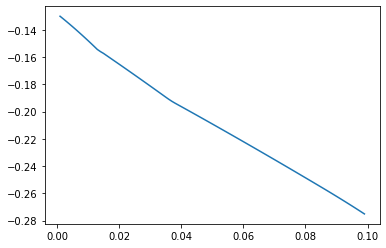

In [23]:
# let's try a couple different values of alpha and see which one performs the best
alpha = []
error =[]

for i in range (1,100):
    alpha.append(i/1000)
    regl = Lasso(alpha=(i/1000))
    error.append(np.mean(cross_val_score(regl, X_train, y_train, scoring='neg_mean_absolute_error', cv=4)))
plt.plot(alpha, error)

In [24]:
err = tuple(zip(alpha, error))
df_err = pd.DataFrame(err, columns=['alpha', 'error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
0,0.001,-0.130036


In [29]:
# random forest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
np.mean(cross_val_score(rfr, X_train, y_train, scoring='neg_mean_absolute_error', cv=4))

-0.08408542847025492

In [30]:
# tune models using GridSearch
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':range(10, 100, 10), 'criterion':('mse', 'mae'), 'max_features':('auto','sqrt','log2')}
gs = GridSearchCV(rfr, parameters, scoring = 'neg_mean_absolute_error', cv=3)
gs.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [31]:
gs.best_score_

-0.08363987990324949

In [32]:
gs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [34]:
# test ensemble
prediction_reg = reg.predict(X_test)
prediction_reg_lasso = reg_lasso.predict(X_test)
prediction_rfr = gs.best_estimator_.predict(X_test)

In [35]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, prediction_reg))
print(mean_absolute_error(y_test, prediction_reg_lasso))
print(mean_absolute_error(y_test, prediction_rfr))

0.1254406803615732
0.3084137806549115
0.0843587565256815


In [36]:
# lasso regression seems to be the worst in this case, and random forest works the best

In [38]:
mean_absolute_error(y_test, (prediction_reg+prediction_rfr)/2)

0.103416805169803

In [39]:
# pickle the model - abstract it, so we make it usable by other programs without having to re-train it
import pickle
pick = {'model' : gs.best_estimator_}
pickle.dump(pick, open('model_file' + ".p", "wb"))

In [40]:
file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

In [41]:
model.predict(X_test.iloc[1,:].values.reshape(1,-1))

array([0.67025409])